### Time Series - white noise
1. To identify wheter the series to be forecasted is white noise or not.
It is hard to predict
2. The error values of our predictions are white noise or not.
* Series should not be white noise
* Error values should be white noise

####  Time Series - Random Walk 
* * NExt value of the series is the modification of the previous value in the sequence

in the case of Random walk, naive forecasting gives the best result

### Decomposing Time Series
#### Additive Model
y(t) = Level + Trend + Seasonality + Noise
#### Multiplicative MOdel
y(t) = Level * Trend *Seasonality * Noise

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
miles_decomp = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])
miles_decomp.head()

<IPython.core.display.Javascript object>

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [5]:
miles_decomp.index = miles_decomp['Month']
miles_decomp.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [6]:
result = seasonal_decompose(miles_decomp['MilesMM'], model='additive')

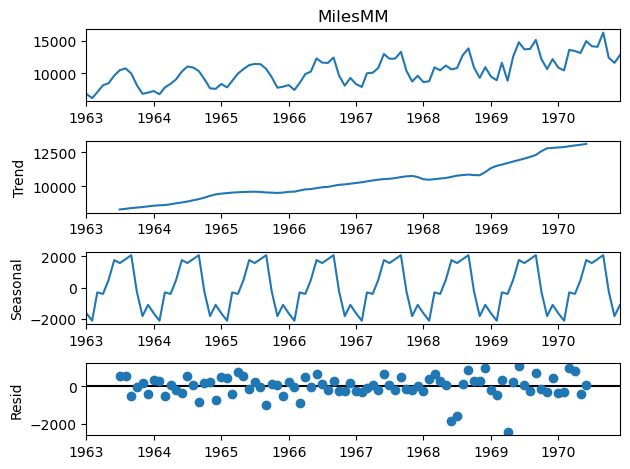

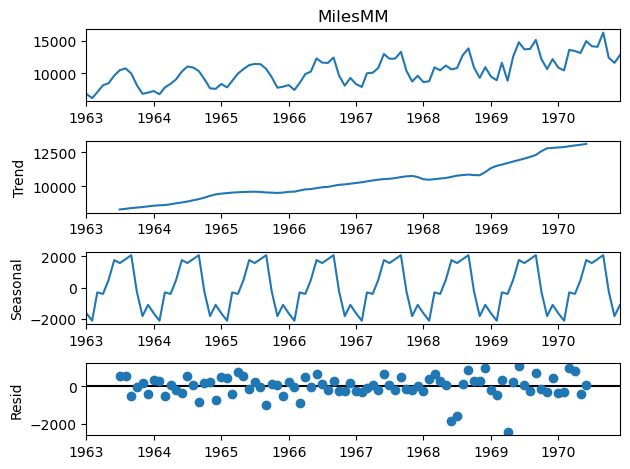

In [7]:
result.plot()

## using the multiplicative model

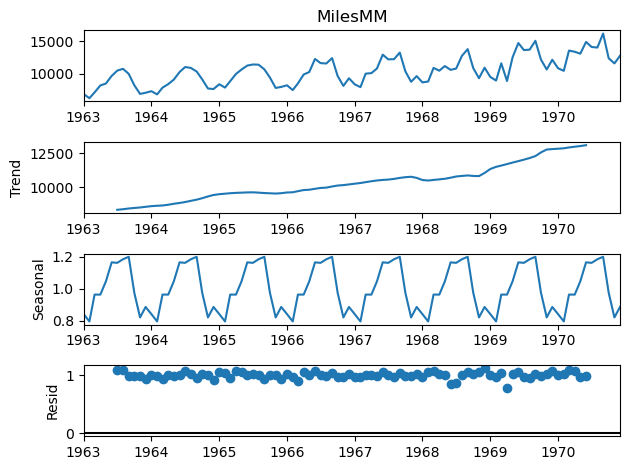

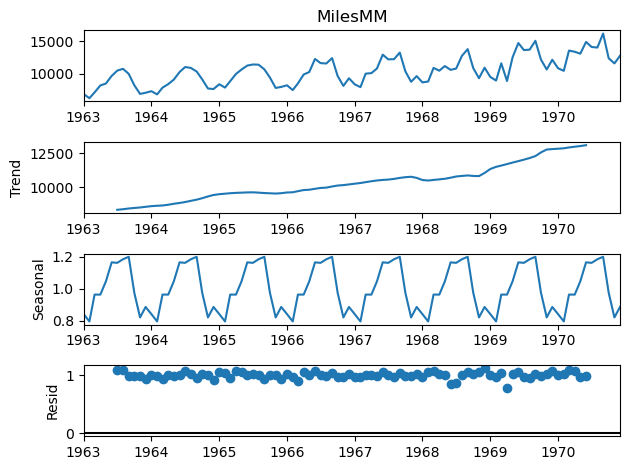

In [8]:
result2 = seasonal_decompose(miles_decomp['MilesMM'], model='multiplicative')
result2.plot()

## Removing trend and seasonality
#### 1. Time Series Differencing
Differencing is a method for removing trend and seasonality
1. Lag 1 Differencing $Y(t) - Y(t-1)$
2. Lag k Differencing  $Y(t) - Y(t-k)$

In [9]:
miles_decomp.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [10]:
df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])
df.head()

<IPython.core.display.Javascript object>

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [11]:
df['lag1'] = df['MilesMM'].shift(1)
df['MilesMM_diff_1'] = df['MilesMM'].diff(periods=1)

In [12]:
df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


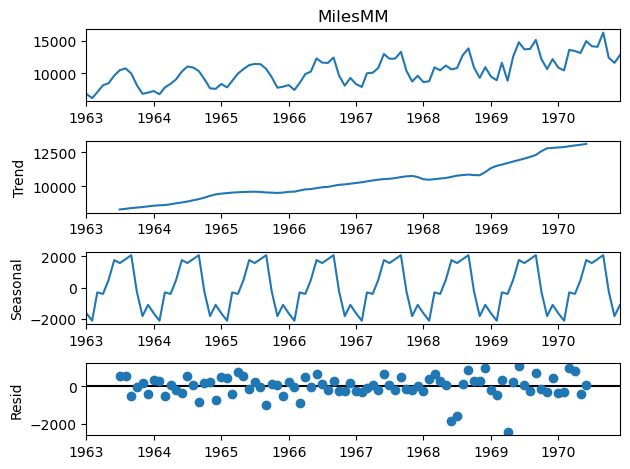

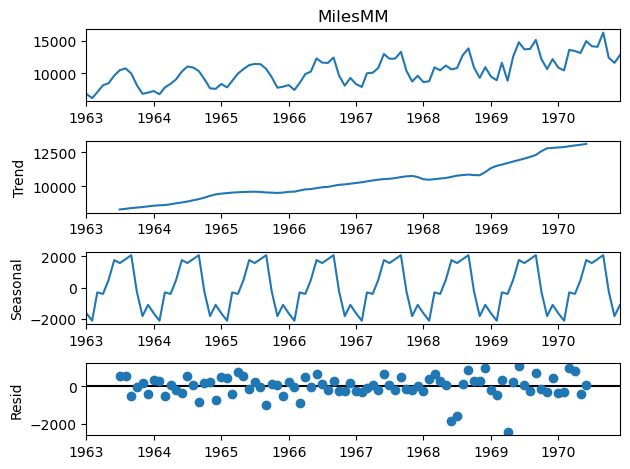

In [13]:
df.index = df['Month']
results_a = seasonal_decompose(df.MilesMM, model='additive')
results_a.plot()

In [14]:
## Excluding the nan in the plot

In [16]:
df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
Month,,,,
1963-01-01,1963-01-01,6827,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0
1963-03-01,1963-03-01,7084,6178.0,906.0
1963-04-01,1963-04-01,8162,7084.0,1078.0
1963-05-01,1963-05-01,8462,8162.0,300.0


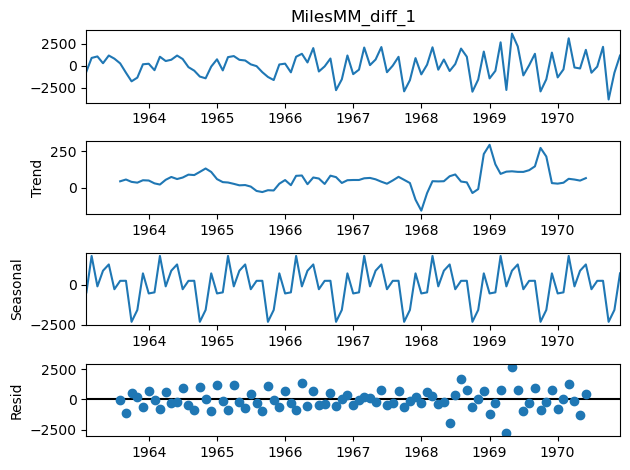

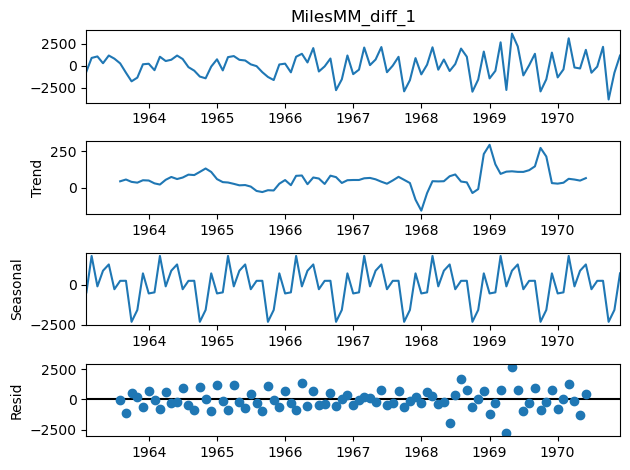

In [17]:
result_b = seasonal_decompose(df.iloc[1:,3],model='additive')
result_b.plot()

### Remove seasonality

<IPython.core.display.Javascript object>

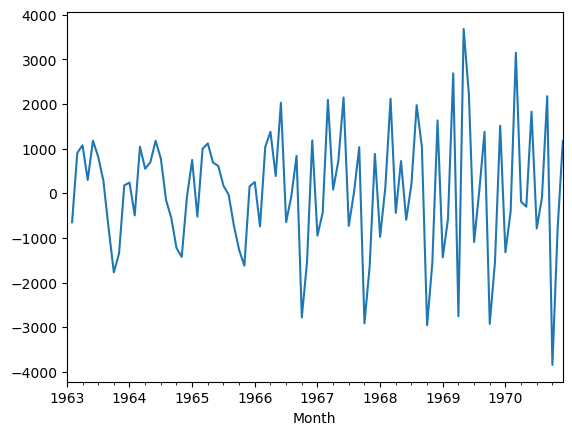

In [18]:
df.MilesMM_diff_1.plot()
plt.show()

In [19]:
df['MilesMM_dff_12'] = df.MilesMM_diff_1.diff(periods=12)


<IPython.core.display.Javascript object>

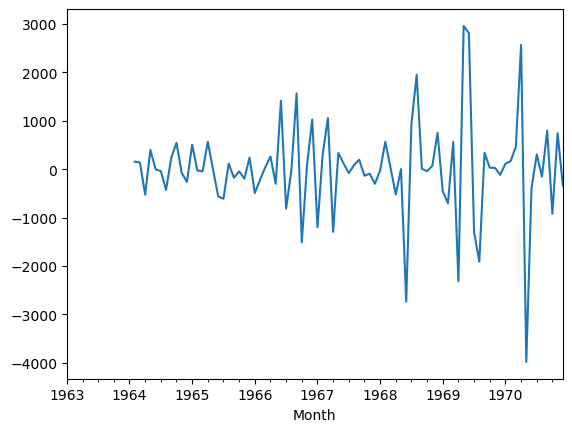

In [20]:
df['MilesMM_dff_12'].plot()
plt.show()

In [22]:
df.head(30)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_dff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


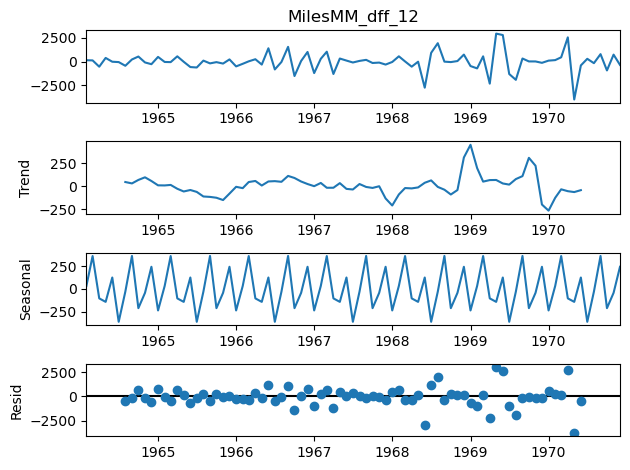

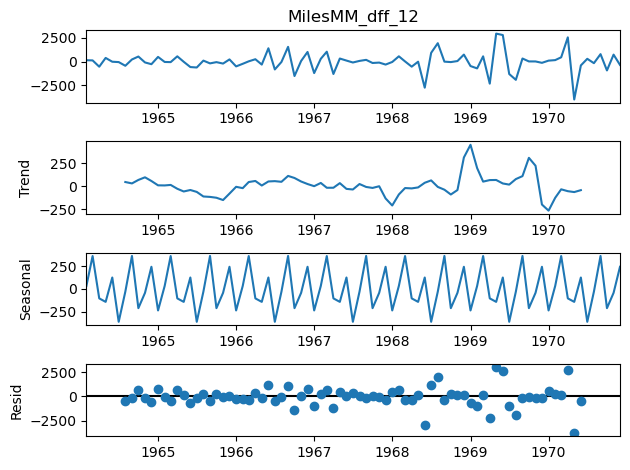

In [24]:
result_c = seasonal_decompose(df.iloc[13:, 4], model='additive')
result_c.plot()

### Test-Train Split

In [31]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0, parse_dates=[0])

<IPython.core.display.Javascript object>

In [32]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [33]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [34]:
temp_df.shape

(3650, 2)

In [35]:
temp_df.shape[0]

3650

In [36]:
train_size = int(temp_df.shape[0] * 0.8)

In [37]:
train_size

2920

In [38]:
train = temp_df[0:train_size]
train.shape

(2920, 2)

In [39]:
test = temp_df[train_size:]
test.shape

(730, 2)

### Walk-forward validation
This involves training the data available in steps

### Persistence Model

In [40]:
df = pd.read_csv("daily-min-temperatures.csv", header=0, parse_dates=[0])
df.head()

<IPython.core.display.Javascript object>

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [41]:
df['t'] = df.Temp.shift(1)
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [42]:
train, test = df[1:df.shape[0]-7], df[df.shape[0] -7:]


In [45]:
test.head()

,Date,Temp,t
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5
3649,1990-12-31,13.0,15.7


In [46]:
train_x, train_y = train['t'], train['Temp']
test_x, test_y = test['t'], test['Temp']

In [48]:
prediction = test_x.copy()

In [50]:
print(prediction)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, prediction)
mse

3.4228571428571413

In [52]:
%matplotlib inline
from matplotlib import pyplot

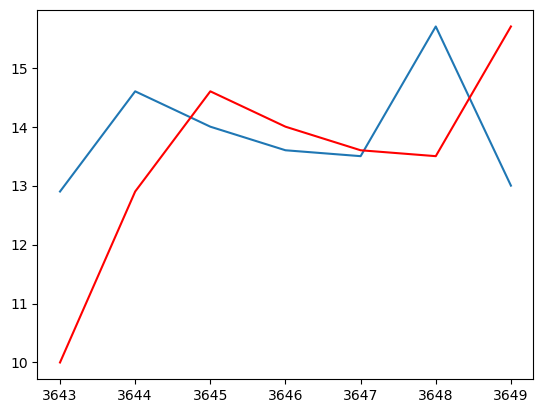

In [54]:
pyplot.plot(test_y)
pyplot.plot(prediction, color='red')
pyplot.show()

## AUTO REGRESSION MODEL
A linear regression model used mostly on series without trend and seasonality..

Simple regression model
 * $y = B_{0} + B_{1} * X_{1}$
 
#### Steps
1. Feed a set of x and y values to the model
2. Model tries to fit a straigth line on teh given values. Finds values of B1 by minimizing total error.
3. Use B0 and B1 values to predict future values of Y


In [96]:
df = pd.read_csv('daily-min-temperatures.csv', header=0,parse_dates=[0])
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]
train.shape, test.shape

<IPython.core.display.Javascript object>

((3642,), (7,))

In [97]:
train.head()


1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [98]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags=29)
model_fit = model.fit()

In [99]:
model_fit.params

const       0.557544
Temp.L1     0.588595
Temp.L2    -0.090826
Temp.L3     0.048262
Temp.L4     0.040065
Temp.L5     0.039302
Temp.L6     0.025946
Temp.L7     0.044668
Temp.L8     0.012768
Temp.L9     0.037436
Temp.L10   -0.000812
Temp.L11    0.004791
Temp.L12    0.018473
Temp.L13    0.026891
Temp.L14    0.000576
Temp.L15    0.024810
Temp.L16    0.007403
Temp.L17    0.009916
Temp.L18    0.034160
Temp.L19   -0.009120
Temp.L20    0.024213
Temp.L21    0.018787
Temp.L22    0.012184
Temp.L23   -0.018553
Temp.L24   -0.001772
Temp.L25    0.016732
Temp.L26    0.019762
Temp.L27    0.009832
Temp.L28    0.006227
Temp.L29   -0.001377
dtype: float64

In [100]:
# coefficient of lag variables


In [101]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [102]:
predictions

3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649          NaN
dtype: float64

In [103]:
predictions.iloc[0]

13.053794217229816

In [104]:
mse = mean_squared_error(test_y[:-1], predictions[:-1])
mse

1.4148209722582408

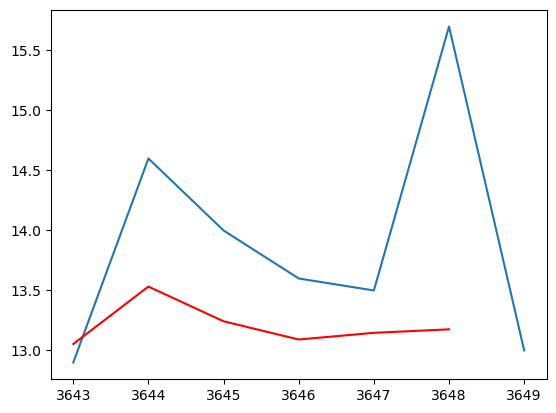

In [105]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### Walk forward Validation with Auto-Regression
Here we use loops and use the data available at the time for training and only get the predictions which were were available at that particular time.

In [117]:
df = pd.read_csv('daily-min-temperatures.csv', header=0, parse_dates=[0])


<IPython.core.display.Javascript object>

In [118]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [119]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]
train.shape, test.shape

((3642,), (7,))

In [120]:
import numpy as np

In [121]:
data = train
predict = []
for t in test:
    model = AutoReg(data, lags=5)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train) + len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

11.819210995394112


<IPython.core.display.Javascript object>

12.996941564269804


<IPython.core.display.Javascript object>

13.627834570654212


<IPython.core.display.Javascript object>

13.24083905832296


<IPython.core.display.Javascript object>

12.84648005882827


<IPython.core.display.Javascript object>

13.238309804732843


<IPython.core.display.Javascript object>

14.827604695537389


<IPython.core.display.Javascript object>

In [122]:
predict

[11.819210995394112,
 12.996941564269804,
 13.627834570654212,
 13.24083905832296,
 12.84648005882827,
 13.238309804732843,
 14.827604695537389]

In [125]:
mse = mean_squared_error(test, predict)
mse

1.976078680543295

In [124]:
## plotting

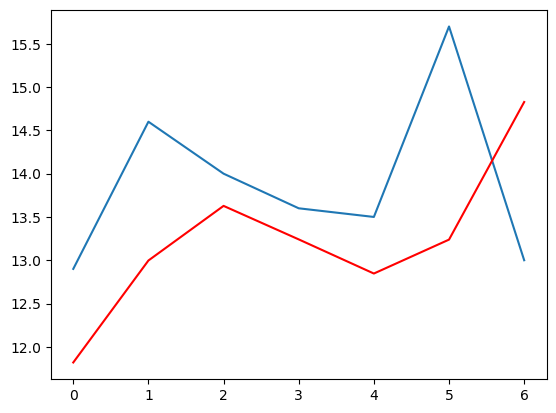

In [130]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')
pyplot.show()